In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from lung_map_utils import utils
from lung_map_utils_extra import utils_extra

%matplotlib inline

In [25]:
fig_size = (12, 12)

img_file = "data/mouse_16.5_20x/LMEX0000000073_acta2_sftpc_sox9/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_001.tif"
img = cv2.imread(img_file)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

img_shape = (img.shape[0], img.shape[1])

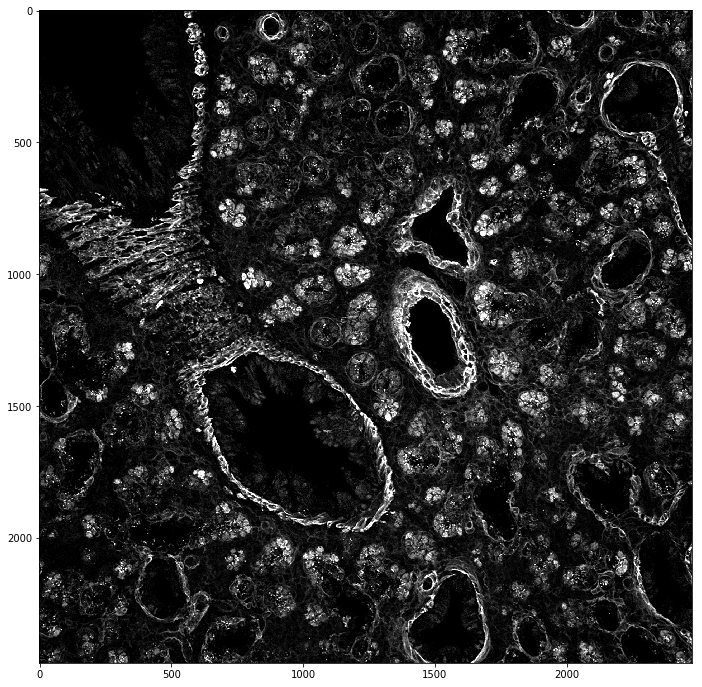

In [26]:
b_over_r = img_rgb[:, :, 0] < img_rgb[:, :, 2]
b_over_g = img_rgb[:, :, 1] < img_rgb[:, :, 2]

b_over_rg = np.bitwise_and(b_over_r, b_over_g)

b_replace = np.max([img_rgb[:, :, 0], img_rgb[:, :, 1]], axis=0)

b_suppress_img = img_rgb.copy()
b_suppress_img[b_over_rg, 2] = b_replace[b_over_rg]
b_suppress_img_hsv = cv2.cvtColor(b_suppress_img, cv2.COLOR_RGB2HSV)

enhanced_v_img = b_suppress_img_hsv[:, :, 2]

fig = plt.figure(figsize=fig_size)
plt.imshow(enhanced_v_img, cmap='gray')

In [67]:
# diff of gaussians
img_blur_1 = cv2.blur(enhanced_v_img, (7, 7))
img_blur_2 = cv2.blur(enhanced_v_img, (255, 255))

tmp_img_1 = img_blur_1.astype(np.int16)
tmp_img_2 = img_blur_2.astype(np.int16)

tmp_img = tmp_img_2 - tmp_img_1
tmp_img[tmp_img > 0] = 0
tmp_img[tmp_img < 0] = 255

tmp_img = tmp_img.astype(np.uint8)

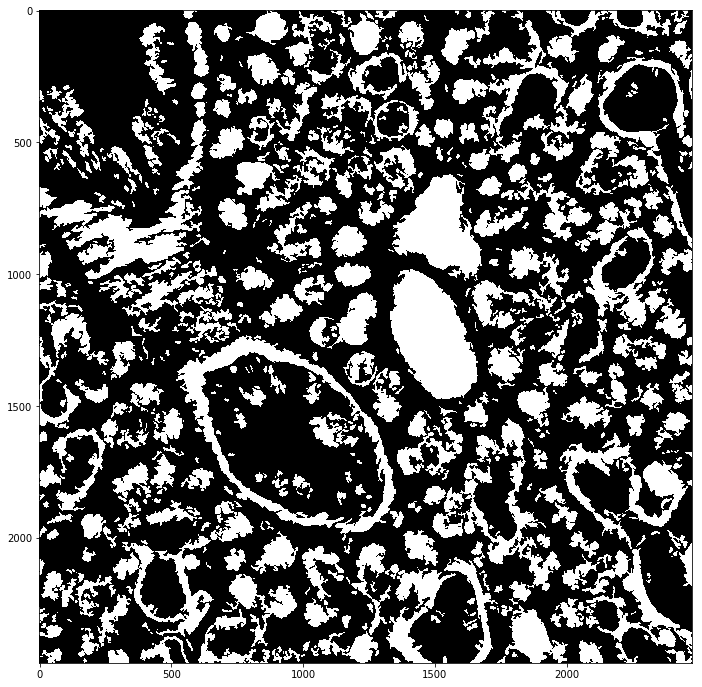

In [69]:
contours = utils_extra.filter_contours_by_size(tmp_img, min_size=15*15)

filtered_mask = np.zeros(img_shape, dtype=np.uint8)
cv2.drawContours(filtered_mask, contours, -1, 255, -1)

fig = plt.figure(figsize=fig_size)
plt.imshow(cv2.cvtColor(filtered_mask, cv2.COLOR_GRAY2RGB))

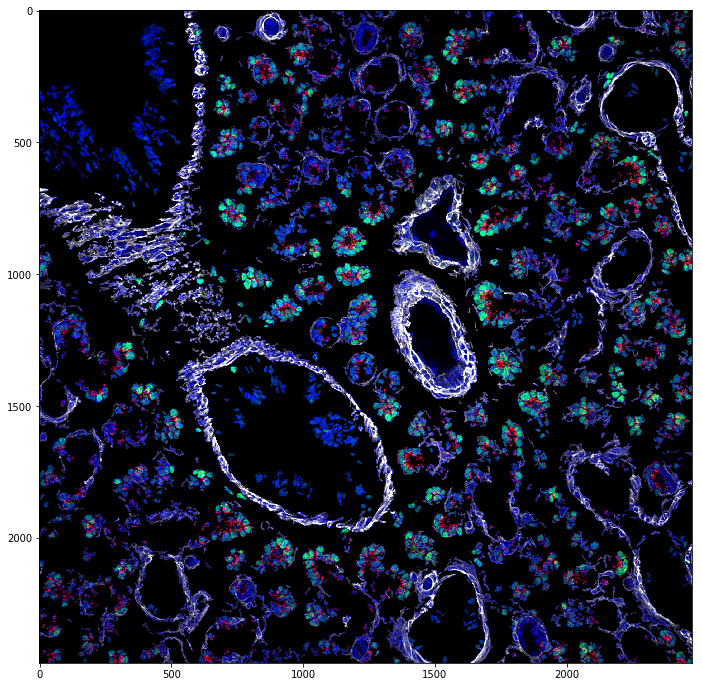

In [63]:
mask_img = cv2.bitwise_and(img_hsv, img_hsv, mask=filtered_mask)

fig = plt.figure(figsize=fig_size)
plt.imshow(cv2.cvtColor(mask_img, cv2.COLOR_HSV2RGB))